<a href="https://colab.research.google.com/github/sfkounga/ProjectsPortfolio/blob/main/Stat_Descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistiques Desctiptives avec Python**

---



In [4]:
# Importer de la librairie pandas
import pandas as pd

In [28]:
# Connecter mon Google Drive à ma session actuelle sur Google Colab
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [29]:
import os

In [30]:
# Listing des fichiers contenus dans le dossier de travail
os.listdir('/gdrive/MyDrive/Colab_Notebooks')

['Python Test.ipynb', 'Stat Descriptive.ipynb', 'Poids-Taille-imc.csv']

In [33]:
# Importer le jeu de données et prévisualisation des 5 premières lignes des données
df= pd.read_csv('/gdrive/MyDrive/Colab_Notebooks/Poids-Taille-imc.csv', encoding='latin-1')
df.head(5)

,Genre,Taille,Poids,IMC
0,Homme,1.875714,109.720985,Obèse
1,Homme,1.747060,73.622732,Normal
2,Homme,1.882397,96.497550,Surpoids
3,Homme,1.821967,99.809504,Obèse
4,Homme,1.774998,93.598619,Surpoids


In [34]:
# Informations relatives aux variables et données contenues dnas le fichier df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genre   10000 non-null  object 
 1   Taille  10000 non-null  float64
 2   Poids   10000 non-null  float64
 3   IMC     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB



*1.  Analyse des Variables Qualitatives*


---







In [35]:
# Analyse de la première variable qualitative "Genre"
df['Genre'].value_counts()

Homme    5000
Femme    5000
Name: Genre, dtype: int64

<Axes: >

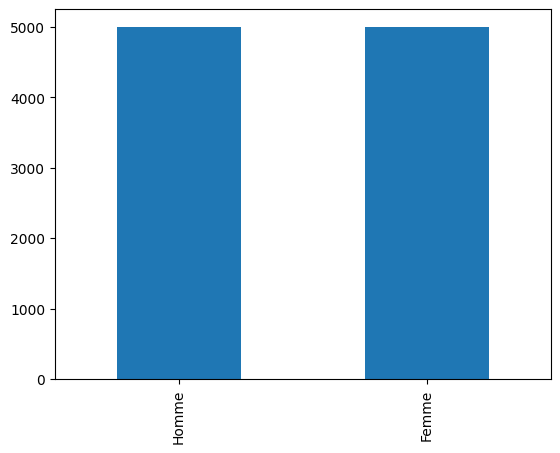

In [36]:
# Représentation graphique de la variable qualitative "Genre"
df['Genre'].value_counts().plot(kind='bar')

In [37]:
# Analyse de la seconde variable qualitative "IMC"
df['IMC'].value_counts()

Surpoids      5589
Normal        4114
Obèse          255
Sous-poids      42
Name: IMC, dtype: int64

<Axes: >

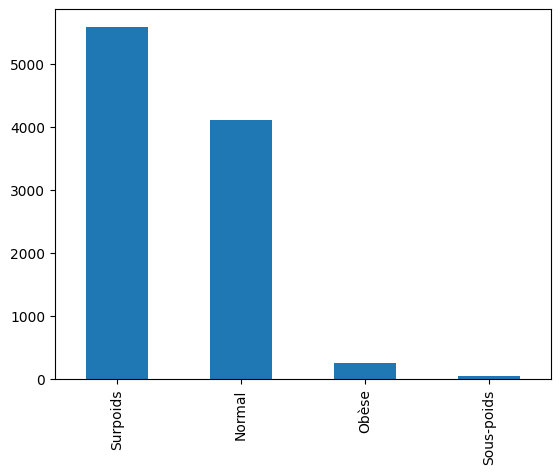

In [38]:
# Représentation graphique de la variable qualitative "IMC"
df['IMC'].value_counts().plot(kind='bar')

*2.  Analyse des Variables Quantitatives*


---

In [39]:
# Calcul de la moyenne arithmétique de la variable quantitative "Taille"
df['Taille'].mean()

1.6857360177711003

In [40]:
# Calcul de la moyenne arithmétique de la variable quantitative "Poids"
df['Poids'].mean()

73.22805433651601

In [41]:
# Identification de la valeur maximale pour la variable quantitative "Poids"
df['Poids'].max()

122.4651673

In [42]:
# Identification de la valeur minimale pour la variable quantitative "Poids"
df['Poids'].min()

29.34745988

In [43]:
# Identification de la médiane pour la variable quantitative "Poids"
df['Poids'].median()

73.1248943

<Axes: ylabel='Frequency'>

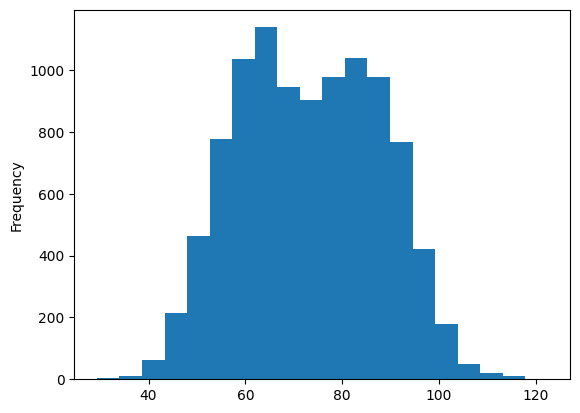

In [46]:
# Réprésentation graphique (sous forme d'histogramme) de la repartition du poids pour l'ensemble de la population contenue dans le jeu de données
df['Poids'].plot.hist(bins=20)

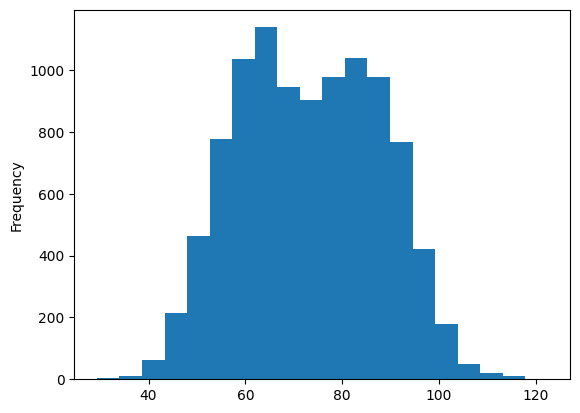

In [63]:
# Réprésentation graphique (sous forme d'histogramme) de la repartition du poids pour l'ensemble de la population ayant comme Genre = "Homme"
df_male=df[df['Genre']=='Homme']
df_male = df['Poids'].plot.hist(bins=20)

# Nous constatons deux pics dans la repartition des valeurs ==> Comme hypothèse nous pouvons dire que ça pourrait être lié aux
# valeurs aberrantes contenues dans les données. (à vérifier)

In [55]:
# Calcul des quartiles pour la variable quantitative "Poids"
df['Poids'].quantile([0.25, 0.5, 0.75])

0.25    61.605982
0.50    73.124894
0.75    84.898599
Name: Poids, dtype: float64

<Axes: >

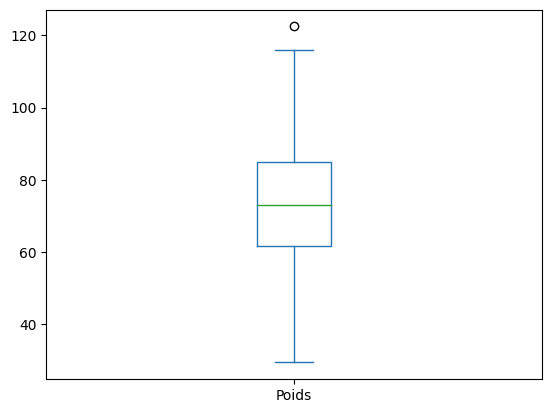

In [58]:
# Boîte à moustaches pour la variable quantitative "Poids" contenant le Min, le 1er Quartile, la Médiane (2e Quartile),
# le 3e Quartile, le Max ainsi que les éventuelles valeurs aberrantes
df['Poids'].plot.box()

*3.  Analyse des éventuelles valeurs aberrantes*


---

In [59]:
# On calcule les quartiles relatives au Poids
Q1 = df['Poids'].quantile(0.25)
Q3 = df['Poids'].quantile(0.75)
IQR = Q3 - Q1
coef = IQR*1.5

In [74]:
# On calcule la borne inférieure
lim_inf = Q1 - coef
lim_inf


26.667055138750015

In [85]:
# On calcule la borne supérieure
lim_sup = Q3 + coef
lim_sup

119.83752550874999

In [64]:
# On cherche les valeurs aberrantes
outliers = df[(df['Poids'] >  lim_sup) | (df['Poids'] <  lim_inf)]
outliers

,Genre,Taille,Poids,IMC
2014,Homme,2.006568,122.465167,Obèse


In [76]:
# On ajuste le jeu des données en excluant les valeurs aberrantes
df_ajusté = df[(df['Poids'] <  lim_sup) & (df['Poids'] >  lim_inf)]

#filtre des colonnes
df_ajusté.sort_values("Poids")


,Genre,Taille,Poids,IMC
9285,Femme,1.378284,29.347460,Sous-poids
5360,Femme,1.413972,31.289924,Sous-poids
6624,Femme,1.387268,32.383633,Sous-poids
9566,Femme,1.456769,32.998884,Sous-poids
7935,Femme,1.478576,35.164164,Sous-poids
...,...,...,...,...
2070,Homme,1.967625,114.557694,Surpoids
3285,Homme,1.994617,115.162021,Surpoids
4331,Homme,1.951959,115.307202,Obèse
994,Homme,1.983635,115.979317,Surpoids


In [81]:
df_male=df[df['Genre']=='Homme']
df_male.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Genre   4999 non-null   object 
 1   Taille  4999 non-null   float64
 2   Poids   4999 non-null   float64
 3   IMC     4999 non-null   object 
dtypes: float64(2), object(2)
memory usage: 195.3+ KB


<Axes: ylabel='Frequency'>

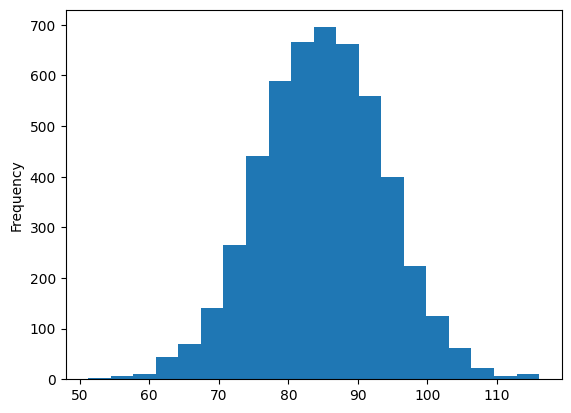

In [84]:
#Nouvelle representation graphique
df_male['Poids'].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

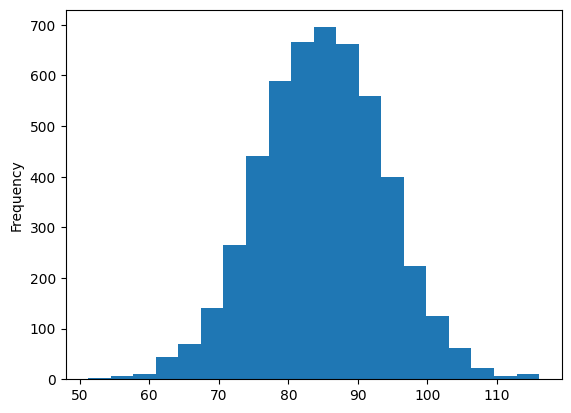

In [82]:
df_male['Poids'].plot.hist(bins=20)